In [ ]:
run keras_title_projattention.py

Using TensorFlow backend.


maxlen 30 epoch 10 dim_lstm 200
dim_Dense 800
dropout_rate 0.0 , LSTM type: bi-lstm sum
Activation function: ['relu', 'relu', 'relu']
bias of y: 0
loss_function: mse
start: 0 end:
------------------------------
Reading English Data: 72043
Reading jp Data: 72043
Merging the English and Japanes news dataframe...
Drop the null line...
False    72031
True        12
Name: en_article, dtype: int64
Using the new test data to evaluate.......


/home/R2016hwang/research/keras_title_projattention.py:408: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if token in model:
/home/R2016hwang/research/keras_title_projattention.py:414: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  r.append(model[token])
/home/R2016hwang/research/keras_title_projattention.py:569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_evaluate['word2vec_en'] = df_pairs_evaluate['en_article'].apply(doc2embed, args=(model_en,))
/home/R2016hwang/research/keras_title_projattention.py:412: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use 

长度为零
长度为零
长度为零
长度为零
长度为零
长度为零
长度为零


/home/R2016hwang/research/keras_title_projattention.py:591: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['padding_en'] = df_pairs_sample['word2vec_en'].apply(padding, args=(TIME_STEP,))
/home/R2016hwang/research/keras_title_projattention.py:593: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['padding_jp'] = df_pairs_sample['word2vec_jp'].apply(padding, args=(TIME_STEP,))


C value = 6 position: [2556, 16702, 34814, 39415, 45340, 47525]


/home/R2016hwang/research/keras_title_projattention.py:698: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=[<tf.Tenso...)`
  model_lstm2 = Model(input=[input_1, input_2], output=main_output)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input_1 (InputLayer)       (None, 30, 200)      0                                            
__________________________________________________________________________________________________
main_input_2 (InputLayer)       (None, 30, 200)      0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 30, 200)      641600      main_input_1[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 30, 200)      641600      main_input_2[0][0]               
__________________________________________________________________________________________________
dot_1 (Dot

In [6]:
len(model_lstm2.layers)

17

In [5]:
np.array(sim_results_test).shape

(25, 50000)

In [3]:
rank_results_test

[211.5,
 449.0,
 409.5,
 2.0,
 479.0,
 19.0,
 170.5,
 65.0,
 365.0,
 102.5,
 178.5,
 137.0,
 298.0,
 494.5,
 420.0,
 70.0,
 418.0,
 286.5,
 14.0,
 369.5,
 309.0,
 48.5,
 480.0,
 402.5,
 38.0]

In [6]:
proj1_tile = np.repeat(X1_test_1, len(X2_test_1), axis=0)
proj2_tile = np.tile(X2_test_1, (len(X1_test_1), 1, 1))
print(proj1_tile.shape)
print(proj2_tile.shape)

(250000, 30, 200)
(250000, 30, 200)


In [7]:
sim = model_lstm2.predict([proj1_tile, proj2_tile])

In [11]:
sim[:,0].shape

(250000,)

In [32]:
sample_length=len(X2_test_1)
rank_results = []
i = 0
for j in range(0, 500):
    print(proj1_tile[j*sample_length:j*sample_length+20,0,0])
    print(proj2_tile[j*sample_length:j*sample_length+20,0,0])
    print(sim[:,0][j*sample_length:(j+1)*sample_length],"\n")
    rank = pd.Series(sim[:,0][j*sample_length:(j+1)*sample_length]).rank(ascending=False)[i+j]
    #sim_results.append(sim)
    rank_results.append(rank)


[-1.5777866 -1.5777866 -1.5777866 -1.5777866 -1.5777866 -1.5777866
 -1.5777866 -1.5777866 -1.5777866 -1.5777866 -1.5777866 -1.5777866
 -1.5777866 -1.5777866 -1.5777866 -1.5777866 -1.5777866 -1.5777866
 -1.5777866 -1.5777866]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[ 0.40235338  0.40235338  0.40235338  0.40235338  0.40235338  0.40235338
  0.40235338  0.40235338  0.40235338  0.40235338  0.5826818   0.24706875
  0.20288594  0.11540334  0.6593997   0.44414046  0.02262787  0.3529372
  0.13789877  0.62043375  0.85505956  0.52420396  0.3823457   0.49613276
  0.4331722   0.4331722   0.4331722   0.4331722   0.22595774  0.36408824
  0.47144437  0.47144437  0.4757314   0.4757314   0.4860522   0.22523588
  0.29299054  0.24663211  0.30190217  0.47680044  0.43072322  0.37175998
  0.43878046  0.72297

[0.4361619 0.4361619 0.4361619 0.4361619 0.4361619 0.4361619 0.4361619
 0.4361619 0.4361619 0.4361619 0.4361619 0.4361619 0.4361619 0.4361619
 0.4361619 0.4361619 0.4361619 0.4361619 0.4361619 0.4361619]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[ 5.04586361e-02  5.04586361e-02  5.04586361e-02  5.04586361e-02
  5.04586361e-02  5.04586361e-02  5.04586361e-02  5.04586361e-02
  5.04586361e-02  5.04586361e-02  9.60696265e-02  5.11832893e-01
  5.90445399e-01  2.91667163e-01 -1.97979417e-02  5.25288820e-01
  1.27197191e-01 -4.14346695e-01  5.65458350e-02  9.49296057e-02
  3.21296990e-01  3.80154043e-01 -1.83662862e-01  1.00941777e+00
  5.53373456e-01  5.53373456e-01  5.53373456e-01  5.53373456e-01
 -1.52483135e-01  4.05173779e-01  3.60715240e-01  3.60715240e-01
  1.07184243e+00  1.07184243e+00

[0.8585825 0.8585825 0.8585825 0.8585825 0.8585825 0.8585825 0.8585825
 0.8585825 0.8585825 0.8585825 0.8585825 0.8585825 0.8585825 0.8585825
 0.8585825 0.8585825 0.8585825 0.8585825 0.8585825 0.8585825]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[-0.00464431 -0.00464431 -0.00464431 -0.00464431 -0.00464431 -0.00464431
 -0.00464431 -0.00464431 -0.00464431 -0.00464431  0.9506639   0.10928015
  0.39649376  0.64502054  0.44362807 -0.20988561  0.26391718  0.3087051
  0.390863    0.39229485  0.1636153  -0.04495702  0.10381538  0.7237243
  0.66393733  0.66393733  0.66393733  0.66393733  0.6399459  -0.01222131
 -0.03050393 -0.03050393  0.6762859   0.6762859   0.75113255  0.23534827
  0.52744573  0.415145    0.41925612 -0.15687077 -0.01617422  0.5159025
  0.18649021  0.48607868  0.10308959  0.2939


[0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339
 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339
 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[-0.2523552  -0.2523552  -0.2523552  -0.2523552  -0.2523552  -0.2523552
 -0.2523552  -0.2523552  -0.2523552  -0.2523552   1.1816742   0.74634326
  0.51662546  0.22081979  0.94289213  0.5181651   0.4560079   0.8599732
  0.51799005  0.79903024  0.29099986  0.45109144  0.24087551  0.44848293
  0.47294626  0.47294626  0.47294626  0.47294626  0.8079801   0.45944363
  0.35469916  0.35469916  0.32944196  0.32944196  1.0488758   0.28247777
  0.82346827  0.6158333   0.50725824  0.73010904  0.37139377  0.73818976
  0.3813037   0.7902699   0.3095183   0.42


[0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339
 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339
 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339 0.3184339]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[ 0.23158084  0.23158084  0.23158084  0.23158084  0.23158084  0.23158084
  0.23158084  0.23158084  0.23158084  0.23158084  0.2080165   0.20907682
  1.2790307   0.07504847  0.23073336  0.2744834   0.05818076  0.03358607
  0.3997486   0.33193585  0.3995695   0.45259812  0.8905118   0.3812911
  0.44361985  0.44361985  0.44361985  0.44361985  0.10415014  0.26355594
  0.28275302  0.28275302  0.19588353  0.19588353  0.1161054   0.39070517
  0.21371882  0.4626061   0.50198436  0.41405848  0.5111532   0.39392245
  0.36387646  0.6604498  -0.01812013  0.3

[2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746
 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746
 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[-0.33802906 -0.33802906 -0.33802906 -0.33802906 -0.33802906 -0.33802906
 -0.33802906 -0.33802906 -0.33802906 -0.33802906  0.2482967   0.35649118
  0.18446858  0.12722193  0.5120586   0.54412854  0.21711582  0.7129954
  0.22765431  0.47965127  0.41375348  0.59335154  0.24274692  0.31985015
  0.4360072   0.4360072   0.4360072   0.4360072   0.37485275  0.6310968
  0.5683779   0.5683779   0.35711992  0.35711992  0.16917564  0.28822958
  0.40597144  0.50751585  0.24127543  0.45979378  0.49149713  0.5828734
  0.36048245  0.61885446 -0.10058285  0.5146

[0.27997464 0.27997464 0.27997464 0.27997464 0.27997464 0.27997464
 0.27997464 0.27997464 0.27997464 0.27997464 0.27997464 0.27997464
 0.27997464 0.27997464 0.27997464 0.27997464 0.27997464 0.27997464
 0.27997464 0.27997464]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[ 0.05825097  0.05825097  0.05825097  0.05825097  0.05825097  0.05825097
  0.05825097  0.05825097  0.05825097  0.05825097  0.36624187  0.27106434
  1.0016938   0.26640597  0.23702516  0.269096    0.3826979   0.02570905
  0.2733192   0.28221762  0.28985807  0.36279246  0.5021772   0.39767352
  0.54077995  0.54077995  0.54077995  0.54077995  0.06926925  0.31870222
  0.27952936  0.27952936  0.48613513  0.48613513  0.38986707  0.42289335
  0.2507148   0.94636077  1.1877038   0.32425126  0.4576587   0.32577667
  0.27354228  0.3814

[-0.17882597 -0.17882597 -0.17882597 -0.17882597 -0.17882597 -0.17882597
 -0.17882597 -0.17882597 -0.17882597 -0.17882597 -0.17882597 -0.17882597
 -0.17882597 -0.17882597 -0.17882597 -0.17882597 -0.17882597 -0.17882597
 -0.17882597 -0.17882597]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[ 0.10147696  0.10147696  0.10147696  0.10147696  0.10147696  0.10147696
  0.10147696  0.10147696  0.10147696  0.10147696  0.1604244   0.28829113
  0.6176929   0.07368878  0.22019209  0.31807488 -0.08722972 -0.08866818
  0.60459816  0.37708664  0.20878221  0.24860027  0.12479436  0.4435546
  0.6596758   0.6596758   0.6596758   0.6596758  -0.01909559  0.33580542
  0.4053732   0.4053732   0.59459704  0.59459704  0.20883116  0.30643153
  0.085249    0.74129015  0.5793017   0.43962336  0.87543994  0.44394886
 

[2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746
 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746
 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746 2.2077746]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[-0.07508939 -0.07508939 -0.07508939 -0.07508939 -0.07508939 -0.07508939
 -0.07508939 -0.07508939 -0.07508939 -0.07508939  0.77665526  0.869405
  0.5564379  -0.02726085  0.8142479   0.72082615  0.21605997  0.80047625
  0.45461792  0.7502367   0.23392333  0.4659045   0.29366845  0.1746643
  0.50489205  0.50489205  0.50489205  0.50489205  0.70536906  0.42345473
  0.41673926  0.41673926  0.2283076   0.2283076   0.6457301   0.53223777
  0.6644183   0.62146455  0.14988032  0.32034665  0.2691964   0.77727145
  0.40581897  0.64228874 -0.12118646  0.4995

[-0.06140069 -0.06140069 -0.06140069 -0.06140069 -0.06140069 -0.06140069
 -0.06140069 -0.06140069 -0.06140069 -0.06140069 -0.06140069 -0.06140069
 -0.06140069 -0.06140069 -0.06140069 -0.06140069 -0.06140069 -0.06140069
 -0.06140069 -0.06140069]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[ 0.17781596  0.17781596  0.17781596  0.17781596  0.17781596  0.17781596
  0.17781596  0.17781596  0.17781596  0.17781596  0.49257478  0.41567692
  0.34110457  0.48863438  0.5755062   0.3187829   0.7882455   0.36788106
  0.08050279  0.40741867  0.3042172   0.5177563   0.34085634  0.04901002
  0.3218712   0.3218712   0.3218712   0.3218712   0.2661232   0.36828837
  0.39523634  0.39523634  0.20409885  0.20409885  0.20772353  0.50184613
  0.26524982  0.932699    0.43686828  0.32528782  0.24101661  0.34676066


[-1.1914597 -1.1914597 -1.1914597 -1.1914597 -1.1914597 -1.1914597
 -1.1914597 -1.1914597 -1.1914597 -1.1914597 -1.1914597 -1.1914597
 -1.1914597 -1.1914597 -1.1914597 -1.1914597 -1.1914597 -1.1914597
 -1.1914597 -1.1914597]
[ 0.3529833   0.3529833   0.3529833   0.3529833   0.3529833   0.3529833
  0.3529833   0.3529833   0.3529833   0.3529833   0.50905347 -0.20216566
  0.26749212 -0.12119211  0.60491586 -1.3184303   1.4553796   0.77337193
 -0.61793596  0.60491586]
[ 0.22790188  0.22790188  0.22790188  0.22790188  0.22790188  0.22790188
  0.22790188  0.22790188  0.22790188  0.22790188  0.14513595  0.12535574
  0.24743105  0.40565082  0.1926921   0.40850022  0.4132618   0.03284128
  0.4048855   0.22681527  0.4033842   0.34464785  0.57650775  0.3331527
  0.25267273  0.25267273  0.25267273  0.25267273  0.02819824  0.47925505
  0.33486018  0.33486018  0.25961536  0.25961536  0.13867585  0.18071656
  0.03068135  0.46568376  0.2853214   0.49045488  0.58244765  0.18035087
  0.35112515  0.21923

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
rank_results

[211.5,
 211.5,
 464.5,
 464.5,
 468.5,
 468.5,
 468.5,
 468.5,
 464.5,
 464.5,
 467.0,
 110.0,
 2.0,
 9.0,
 37.0,
 239.0,
 5.0,
 10.0,
 9.0,
 305.0,
 146.0,
 108.0,
 9.5,
 6.0,
 86.5,
 86.5,
 86.5,
 86.5,
 10.0,
 51.0,
 100.5,
 100.5,
 22.5,
 22.5,
 110.0,
 48.0,
 28.0,
 165.0,
 3.0,
 21.0,
 7.0,
 75.0,
 238.0,
 12.0,
 19.0,
 127.0,
 28.0,
 172.5,
 172.5,
 12.0,
 9.0,
 191.0,
 33.0,
 29.5,
 29.5,
 29.5,
 29.5,
 163.0,
 84.0,
 38.0,
 2.0,
 6.0,
 44.0,
 26.0,
 58.0,
 4.0,
 5.0,
 4.5,
 22.0,
 129.0,
 122.0,
 16.0,
 98.0,
 447.0,
 21.0,
 173.0,
 179.0,
 9.0,
 9.0,
 43.0,
 304.5,
 13.5,
 28.0,
 28.0,
 46.5,
 17.5,
 10.5,
 22.5,
 5.5,
 46.5,
 3.0,
 1.0,
 153.0,
 1.0,
 5.5,
 100.0,
 1.0,
 61.0,
 130.0,
 35.0,
 19.0,
 21.0,
 143.0,
 91.0,
 2.5,
 158.0,
 9.0,
 67.0,
 49.0,
 19.0,
 12.0,
 76.0,
 4.0,
 76.5,
 76.5,
 16.0,
 443.0,
 443.0,
 443.0,
 46.0,
 135.0,
 17.0,
 163.0,
 15.0,
 1.0,
 201.0,
 36.0,
 90.0,
 153.5,
 153.5,
 21.0,
 160.0,
 9.5,
 14.0,
 26.0,
 14.0,
 67.0,
 74.0,
 17.0,
 5.0,
 2

In [17]:
(pd.Series(rank_results) <= 1).sum()

13

In [18]:
(pd.Series(rank_results) <= 5).sum()

67

In [19]:
(pd.Series(rank_results) <= 10).sum()

107

In [33]:
model_lstm2.layers()

TypeError: 'list' object is not callable

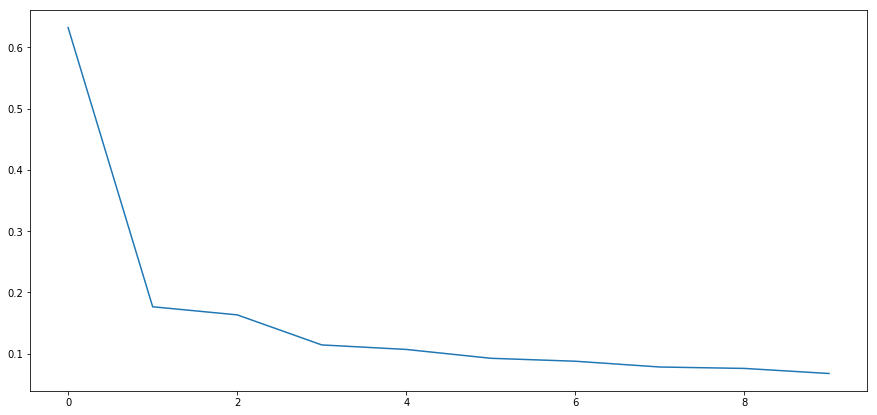

In [4]:
plt.plot(train_loss)

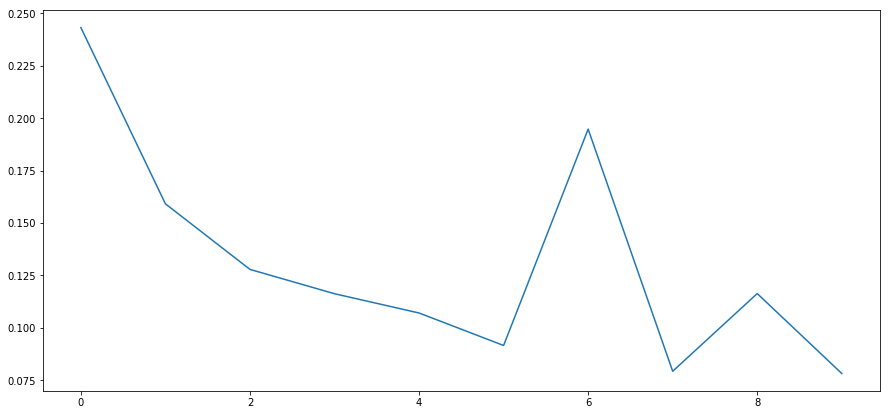

In [5]:
plt.plot(test_loss)

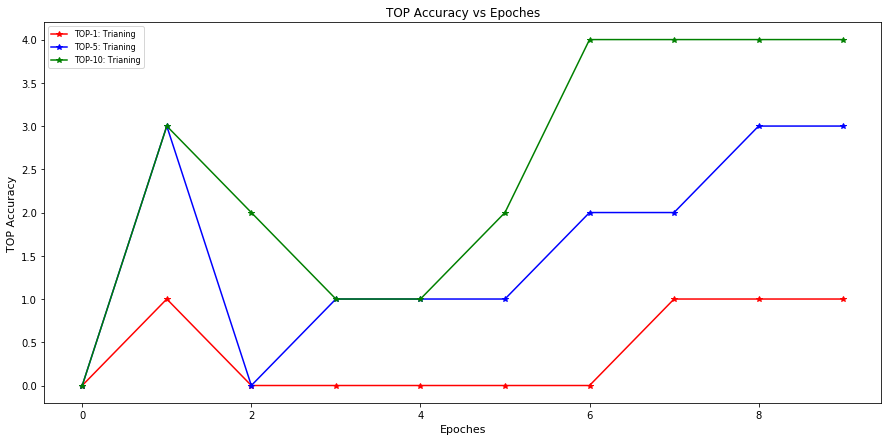

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(tops[1],'r-*', label = "TOP-1: Trianing")
plt.plot(tops[5],'b-*', label = "TOP-5: Trianing" )
plt.plot(tops[10],'g-*', label = "TOP-10: Trianing")
# plt.plot(tops_test[1],'r--', label = "TOP-1: Test")
# plt.plot(tops_test[5],'b--', label = "TOP-5: Test")
# plt.plot(tops_test[10],'g--', label = "TOP10: Test")
plt.ylabel('TOP Accuracy', fontsize=11)
plt.xlabel('Epoches', fontsize=11)
plt.title('TOP Accuracy vs Epoches')
plt.legend(loc = 2, fontsize=8)
plt.savefig('top1-5-10_e40_l0.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
x_batch = K.ones(shape=(32, 10, 200))
y_batch = K.ones(shape=(32, 20, 200))

In [22]:
x_batch.shape

TensorShape([Dimension(32), Dimension(10), Dimension(200)])

In [24]:
ct1.shape

TensorShape([Dimension(None), Dimension(None), Dimension(200)])

In [5]:
xy_batch_dot = K.batch_dot(x_batch, y_batch, axes=[2, 2])

In [6]:
K.int_shape(xy_batch_dot)

(32, 10, 20)

In [11]:
x = K.placeholder(shape=(None,10,200))
y = K.placeholder(shape=(None,20,200))
res = K.batch_dot(x,y,axes = [2,2])
f = K.function([x,y], [res])

xv = np.random.random(size = (32, 100))
yv = np.random.random(size = (32, 100))


In [12]:
K.int_shape(res)

(None, 10, 20)

In [14]:
lstm_out_1.shape

TensorShape([Dimension(None), Dimension(None), Dimension(200)])

In [15]:
maxlen

30

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
run keras_title_projattention.py

Using TensorFlow backend.


maxlen 30 epoch 10 dim_lstm 200
dim_Dense 800
dropout_rate 0.0 , LSTM type: bi-lstm sum
Activation function: ['relu', 'relu', 'relu']
bias of y: 0
loss_function: mse
start: 0 end:
------------------------------
Reading English Data: 72043
Reading jp Data: 72043
Merging the English and Japanes news dataframe...
Drop the null line...
False    72031
True        12
Name: en_article, dtype: int64
Using the new test data to evaluate.......


/home/R2016hwang/research/keras_title_projattention.py:417: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if token in model:
/home/R2016hwang/research/keras_title_projattention.py:423: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  r.append(model[token])
/home/R2016hwang/research/keras_title_projattention.py:578: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_evaluate['word2vec_en'] = df_pairs_evaluate['en_article'].apply(doc2embed, args=(model_en,))
/home/R2016hwang/research/keras_title_projattention.py:421: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use 

长度为零
长度为零
长度为零
长度为零
长度为零
长度为零
长度为零


/home/R2016hwang/research/keras_title_projattention.py:600: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['padding_en'] = df_pairs_sample['word2vec_en'].apply(padding, args=(TIME_STEP,))
/home/R2016hwang/research/keras_title_projattention.py:602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['padding_jp'] = df_pairs_sample['word2vec_jp'].apply(padding, args=(TIME_STEP,))


C value = 10 position: [19493, 20535, 22318, 26794, 27541, 32815, 33469, 33817, 47003, 48839]


/home/R2016hwang/research/keras_title_projattention.py:712: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=[<tf.Tenso...)`
  model_lstm2 = Model(input=[input_1, input_2], output=main_output)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input_1 (InputLayer)       (None, 30, 200)      0                                            
__________________________________________________________________________________________________
main_input_2 (InputLayer)       (None, 30, 200)      0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 30, 200)      641600      main_input_1[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 30, 200)      641600      main_input_2[0][0]               
__________________________________________________________________________________________________
dot_1 (Dot

/home/R2016hwang/research/keras_title_projattention.py:169: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`
  model_1 = Model(input=[input_1, input_2], output=[lstm_out_1, lstm_out_2])
/home/R2016hwang/research/keras_title_projattention.py:261: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=[<tf.Tenso...)`
  model_2 = Model(input=[input_1, input_2], output=main_output)


Use Time(s):  18.499611616134644
Find ranking of  1000  sentence pairs
Use Time(s):  61.68494391441345
TOP 1 27
[T] TOP 1 32
TOP 5 103
[T] TOP 5 151
TOP 10 168
[T] TOP 10 256
Epoch:  2 / 30 ----------------------------------------

Data parts  1 / 10 ----------------------------------------

C value = 1 position: [699]
Train on 9000 samples, validate on 1000 samples
Epoch 2/2
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0949 - val_loss: 0.0966
Data parts  2 / 10 ----------------------------------------

C value = 4 position: [166, 343, 840, 860]
Train on 9000 samples, validate on 1000 samples
Epoch 2/2
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0907 - val_loss: 0.1010
Data parts  3 / 10 ----------------------------------------

C value = 1 position: [854]
Train on 9000 samples, validate on 1000 samples
Epoch 2/2
9000/9000 [==============================] - 15s 2ms/step - loss: 0.1103 - val_loss: 0.0825
Data parts  4 / 10 -----------------

C value = 4 position: [205, 547, 593, 778]
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0256 - val_loss: 0.0486
Data parts  2 / 10 ----------------------------------------

C value = 2 position: [219, 282]
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0251 - val_loss: 0.0631
Data parts  3 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0256 - val_loss: 0.0517
Data parts  4 / 10 ----------------------------------------

C value = 2 position: [606, 711]
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [==============================] - 16s 2ms/step - loss: 0.0234 - val_loss: 0.0701
Data parts  5 / 10 ----------------------------------------

C value = 2 position: 

9000/9000 [==============================] - 16s 2ms/step - loss: 0.0203 - val_loss: 0.0496
Data parts  3 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [==============================] - 16s 2ms/step - loss: 0.0199 - val_loss: 0.0344
Data parts  4 / 10 ----------------------------------------

C value = 1 position: [605]
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0186 - val_loss: 0.0504
Data parts  5 / 10 ----------------------------------------

C value = 3 position: [182, 966, 992]
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [==============================] - 16s 2ms/step - loss: 0.0181 - val_loss: 0.0568
Data parts  6 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [=====================

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 14/14
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0210 - val_loss: 0.0400
Data parts  4 / 10 ----------------------------------------

C value = 1 position: [614]
Train on 9000 samples, validate on 1000 samples
Epoch 14/14
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0175 - val_loss: 0.0567
Data parts  5 / 10 ----------------------------------------

C value = 1 position: [730]
Train on 9000 samples, validate on 1000 samples
Epoch 14/14
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0169 - val_loss: 0.0392
Data parts  6 / 10 ----------------------------------------

C value = 1 position: [82]
Train on 9000 samples, validate on 1000 samples
Epoch 14/14
9000/9000 [==============================] - 16s 2ms/step - loss: 0.0150 - val_loss: 0.0465
Data parts  7 / 10 ----------------------------------------

C value = 3 position: [406, 564, 682]
Tr

Data parts  4 / 10 ----------------------------------------

C value = 1 position: [599]
Train on 9000 samples, validate on 1000 samples
Epoch 20/20
9000/9000 [==============================] - 16s 2ms/step - loss: 0.0121 - val_loss: 0.0530
Data parts  5 / 10 ----------------------------------------

C value = 2 position: [164, 525]
Train on 9000 samples, validate on 1000 samples
Epoch 20/20
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0118 - val_loss: 0.0556
Data parts  6 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 20/20
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0111 - val_loss: 0.0431
Data parts  7 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 20/20
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0116 - val_loss: 0.0501
Data parts  8 / 10 ------------------

9000/9000 [==============================] - 14s 2ms/step - loss: 0.0093 - val_loss: 0.0499
Data parts  5 / 10 ----------------------------------------

C value = 1 position: [464]
Train on 9000 samples, validate on 1000 samples
Epoch 23/23
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0102 - val_loss: 0.0682
Data parts  6 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 23/23
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0083 - val_loss: 0.0416
Data parts  7 / 10 ----------------------------------------

C value = 1 position: [771]
Train on 9000 samples, validate on 1000 samples
Epoch 23/23
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0099 - val_loss: 0.0552
Data parts  8 / 10 ----------------------------------------

C value = 1 position: [602]
Train on 9000 samples, validate on 1000 samples
Epoch 23/23
9000/9000 [============================

C value = 3 position: [17, 483, 581]
Train on 9000 samples, validate on 1000 samples
Epoch 26/26
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0101 - val_loss: 0.0617
Data parts  6 / 10 ----------------------------------------

C value = 4 position: [222, 239, 542, 742]
Train on 9000 samples, validate on 1000 samples
Epoch 26/26
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0087 - val_loss: 0.0530
Data parts  7 / 10 ----------------------------------------

C value = 1 position: [472]
Train on 9000 samples, validate on 1000 samples
Epoch 26/26
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0117 - val_loss: 0.0515
Data parts  8 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 26/26
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0080 - val_loss: 0.0524
Data parts  9 / 10 ----------------------------------------

C value = 1 pos

9000/9000 [==============================] - 14s 2ms/step - loss: 0.0074 - val_loss: 0.0576
Data parts  6 / 10 ----------------------------------------

C value = 2 position: [420, 472]
Train on 9000 samples, validate on 1000 samples
Epoch 29/29
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0085 - val_loss: 0.0440
Data parts  7 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 29/29
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0081 - val_loss: 0.0561
Data parts  8 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 29/29
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0065 - val_loss: 0.0497
Data parts  9 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 29/29
9000/9000 [=============================

In [3]:
len(model_lstm2.layers)

14

In [4]:
model_lstm2.layers

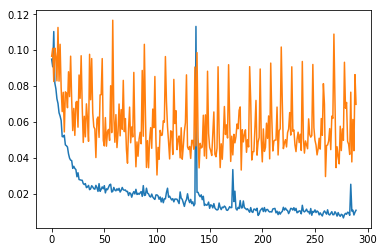

In [4]:
plt.plot(train_loss[10:])
plt.plot(test_loss[10:])

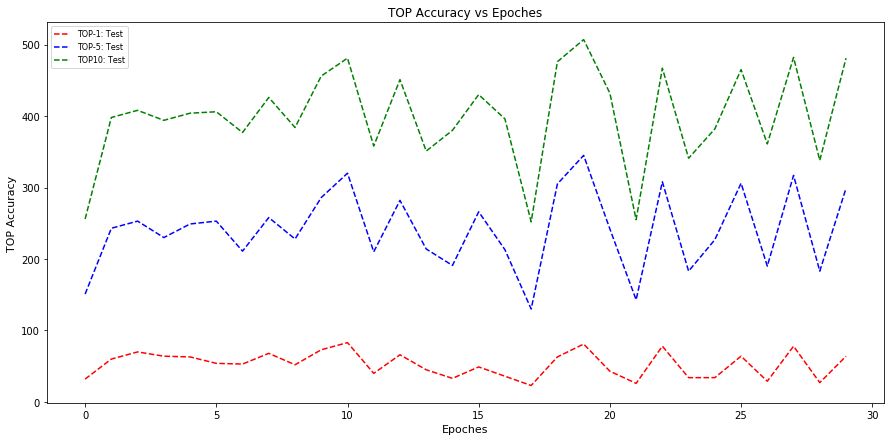

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 7)
#plt.plot(tops[1],'r-*', label = "TOP-1: Trianing")
#plt.plot(tops[5],'b-*', label = "TOP-5: Trianing" )
#plt.plot(tops[10],'g-*', label = "TOP-10: Trianing")
plt.plot(tops_test[1],'r--', label = "TOP-1: Test")
plt.plot(tops_test[5],'b--', label = "TOP-5: Test")
plt.plot(tops_test[10],'g--', label = "TOP10: Test")
plt.ylabel('TOP Accuracy', fontsize=11)
plt.xlabel('Epoches', fontsize=11)
plt.title('TOP Accuracy vs Epoches')
plt.legend(loc = 2, fontsize=8)
plt.savefig('top1-5-10_e40_l0.eps', format='eps', dpi=1000)
plt.show()

In [6]:
code = "concat_atten"
path_model_lstm2 = "model_lstm2_" + code
model_lstm2.save(path_model_lstm2)

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
run keras_title_projattention.py

Using TensorFlow backend.


maxlen 30 epoch 10 dim_lstm 200
dim_Dense 50
dropout_rate 0.0 , LSTM type: bi-lstm sum
Activation function: ['relu', 'relu', 'relu']
bias of y: 0
loss_function: mse
start: 0 end:
------------------------------
Reading English Data: 72043
Reading jp Data: 72043
Merging the English and Japanes news dataframe...
Drop the null line...
False    72031
True        12
Name: en_article, dtype: int64
Using the new test data to evaluate.......


/home/R2016hwang/research/keras_title_projattention.py:432: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if token in model:
/home/R2016hwang/research/keras_title_projattention.py:438: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  r.append(model[token])
/home/R2016hwang/research/keras_title_projattention.py:593: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_evaluate['word2vec_en'] = df_pairs_evaluate['en_article'].apply(doc2embed, args=(model_en,))
/home/R2016hwang/research/keras_title_projattention.py:436: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use 

长度为零
长度为零
长度为零
长度为零
长度为零
长度为零
长度为零


/home/R2016hwang/research/keras_title_projattention.py:615: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['padding_en'] = df_pairs_sample['word2vec_en'].apply(padding, args=(TIME_STEP,))
/home/R2016hwang/research/keras_title_projattention.py:617: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['padding_jp'] = df_pairs_sample['word2vec_jp'].apply(padding, args=(TIME_STEP,))


C value = 5 position: [13191, 17595, 35199, 42911, 45353]


/home/R2016hwang/research/keras_title_projattention.py:735: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ma...)`
  model_lstm2 = Model(input=[input_1, input_2], output=main_output)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input_1 (InputLayer)       (None, 30, 200)      0                                            
__________________________________________________________________________________________________
main_input_2 (InputLayer)       (None, 30, 200)      0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 30, 200)      641600      main_input_1[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 30, 200)      641600      main_input_2[0][0]               
__________________________________________________________________________________________________
dot_1 (Dot

/home/R2016hwang/research/keras_title_projattention.py:184: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  model_1 = Model(input=[input_1, input_2], output=[lstm_out_1, lstm_out_2])
/home/R2016hwang/research/keras_title_projattention.py:276: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ma...)`
  model_2 = Model(input=[input_1, input_2], output=main_output)


Use Time(s):  59.79225969314575
[T] TOP 1 65
[T] TOP 5 221
[T] TOP 10 362
Epoch:  2 / 30 ----------------------------------------

Data parts  1 / 10 ----------------------------------------

C value = 2 position: [617, 758]
Train on 9000 samples, validate on 1000 samples
Epoch 2/2
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0670 - val_loss: 0.0810
Data parts  2 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 2/2
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0630 - val_loss: 0.0750
Data parts  3 / 10 ----------------------------------------

C value = 1 position: [962]
Train on 9000 samples, validate on 1000 samples
Epoch 2/2
9000/9000 [==============================] - 15s 2ms/step - loss: 1.4074 - val_loss: 0.4302
Data parts  4 / 10 ----------------------------------------

C value = 2 position: [386, 427]
Train on 9000 samples, validate on 1000 samples
Epoch 2/

9000/9000 [==============================] - 15s 2ms/step - loss: 0.0316 - val_loss: 0.0510
Data parts  3 / 10 ----------------------------------------

C value = 1 position: [791]
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0352 - val_loss: 0.0534
Data parts  4 / 10 ----------------------------------------

C value = 3 position: [399, 409, 729]
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0535 - val_loss: 0.0687
Data parts  5 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0409 - val_loss: 0.0754
Data parts  6 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 5/5
9000/9000 [=============================

9000/9000 [==============================] - 15s 2ms/step - loss: 0.0457 - val_loss: 0.0680
Data parts  5 / 10 ----------------------------------------

C value = 2 position: [40, 605]
Train on 9000 samples, validate on 1000 samples
Epoch 8/8
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0343 - val_loss: 0.0601
Data parts  6 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 8/8
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0284 - val_loss: 0.0613
Data parts  7 / 10 ----------------------------------------

C value = 2 position: [507, 800]
Train on 9000 samples, validate on 1000 samples
Epoch 8/8
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0286 - val_loss: 0.0762
Data parts  8 / 10 ----------------------------------------

C value = 1 position: [724]
Train on 9000 samples, validate on 1000 samples
Epoch 8/8
9000/9000 [===========================

9000/9000 [==============================] - 15s 2ms/step - loss: 0.0239 - val_loss: 0.0704
Data parts  7 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0209 - val_loss: 0.0627
Data parts  8 / 10 ----------------------------------------

C value = 1 position: [380]
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0240 - val_loss: 0.0526
Data parts  9 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0233 - val_loss: 0.1097
Data parts  10 / 10 ----------------------------------------

C value = 1 position: [632]
Train on 9000 samples, validate on 1000 samples
Epoch 11/11
9000/9000 [==============================

9000/9000 [==============================] - 15s 2ms/step - loss: 0.0187 - val_loss: 0.0465
Data parts  9 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 14/14
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0173 - val_loss: 0.0972
Data parts  10 / 10 ----------------------------------------

C value = 4 position: [243, 536, 767, 931]
Train on 9000 samples, validate on 1000 samples
Epoch 14/14
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0147 - val_loss: 0.0532
Find ranking of  1000  sentence pairs
Use Time(s):  69.72611594200134
[T] TOP 1 78
[T] TOP 5 296
[T] TOP 10 457
Epoch:  15 / 30 ----------------------------------------

Data parts  1 / 10 ----------------------------------------

C value = 4 position: [528, 772, 805, 941]
Train on 9000 samples, validate on 1000 samples
Epoch 15/15
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0173 - val_

9000/9000 [==============================] - 14s 2ms/step - loss: 0.0148 - val_loss: 0.0553
Find ranking of  1000  sentence pairs
Use Time(s):  67.4538164138794
[T] TOP 1 26
[T] TOP 5 194
[T] TOP 10 341
Epoch:  18 / 30 ----------------------------------------

Data parts  1 / 10 ----------------------------------------

C value = 2 position: [525, 566]
Train on 9000 samples, validate on 1000 samples
Epoch 18/18
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0160 - val_loss: 0.0789
Data parts  2 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 18/18
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0147 - val_loss: 0.0548
Data parts  3 / 10 ----------------------------------------

C value = 1 position: [597]
Train on 9000 samples, validate on 1000 samples
Epoch 18/18
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0121 - val_loss: 0.0406
Data parts  4 

9000/9000 [==============================] - 15s 2ms/step - loss: 0.0125 - val_loss: 0.0611
Data parts  2 / 10 ----------------------------------------

C value = 1 position: [83]
Train on 9000 samples, validate on 1000 samples
Epoch 21/21
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0122 - val_loss: 0.0513
Data parts  3 / 10 ----------------------------------------

C value = 2 position: [792, 852]
Train on 9000 samples, validate on 1000 samples
Epoch 21/21
9000/9000 [==============================] - 16s 2ms/step - loss: 0.0103 - val_loss: 0.0439
Data parts  4 / 10 ----------------------------------------

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 21/21
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0130 - val_loss: 0.0656
Data parts  5 / 10 ----------------------------------------

C value = 2 position: [68, 200]
Train on 9000 samples, validate on 1000 samples
Epoch 21/21
9000/9000 [====================

9000/9000 [==============================] - 16s 2ms/step - loss: 0.0084 - val_loss: 0.0392
Data parts  4 / 10 ----------------------------------------

C value = 1 position: [495]
Train on 9000 samples, validate on 1000 samples
Epoch 24/24
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0122 - val_loss: 0.0601
Data parts  5 / 10 ----------------------------------------

C value = 1 position: [787]
Train on 9000 samples, validate on 1000 samples
Epoch 24/24
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0097 - val_loss: 0.0588
Data parts  6 / 10 ----------------------------------------

C value = 1 position: [310]
Train on 9000 samples, validate on 1000 samples
Epoch 24/24
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0085 - val_loss: 0.0579
Data parts  7 / 10 ----------------------------------------

C value = 2 position: [490, 655]
Train on 9000 samples, validate on 1000 samples
Epoch 24/24
9000/9000 [====================

C value = 0 position: []
Train on 9000 samples, validate on 1000 samples
Epoch 27/27
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0092 - val_loss: 0.0648
Data parts  6 / 10 ----------------------------------------

C value = 3 position: [105, 890, 929]
Train on 9000 samples, validate on 1000 samples
Epoch 27/27
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0079 - val_loss: 0.0564
Data parts  7 / 10 ----------------------------------------

C value = 2 position: [11, 269]
Train on 9000 samples, validate on 1000 samples
Epoch 27/27
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0086 - val_loss: 0.0805
Data parts  8 / 10 ----------------------------------------

C value = 1 position: [474]
Train on 9000 samples, validate on 1000 samples
Epoch 27/27
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0094 - val_loss: 0.0462
Data parts  9 / 10 ----------------------------------------

C value = 1 position: [47

Data parts  7 / 10 ----------------------------------------

C value = 2 position: [453, 472]
Train on 9000 samples, validate on 1000 samples
Epoch 30/30
9000/9000 [==============================] - 13s 1ms/step - loss: 0.0074 - val_loss: 0.0649
Data parts  8 / 10 ----------------------------------------

C value = 1 position: [631]
Train on 9000 samples, validate on 1000 samples
Epoch 30/30
9000/9000 [==============================] - 14s 2ms/step - loss: 0.0109 - val_loss: 0.0524
Data parts  9 / 10 ----------------------------------------

C value = 1 position: [133]
Train on 9000 samples, validate on 1000 samples
Epoch 30/30
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0125 - val_loss: 0.0907
Data parts  10 / 10 ----------------------------------------

C value = 3 position: [58, 346, 597]
Train on 9000 samples, validate on 1000 samples
Epoch 30/30
9000/9000 [==============================] - 15s 2ms/step - loss: 0.0081 - val_loss: 0.0581
Find ranking of  1000

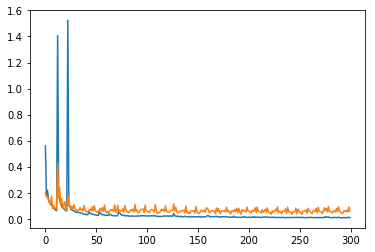

In [3]:
plt.plot(train_loss)
plt.plot(test_loss)

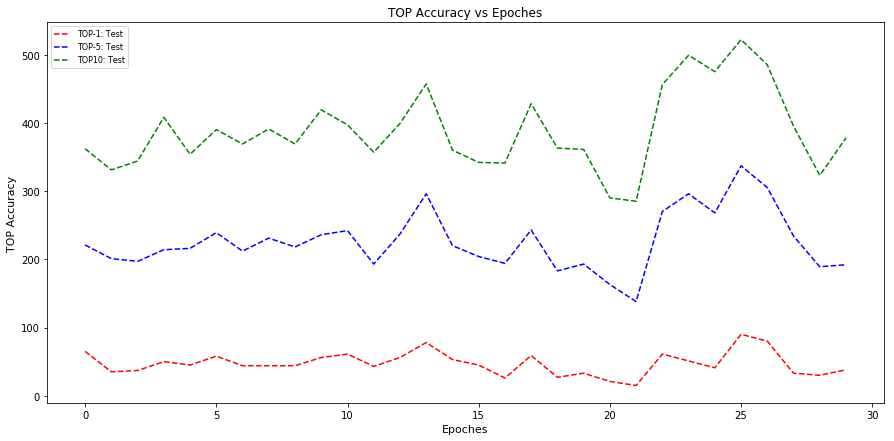

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 7)
#plt.plot(tops[1],'r-*', label = "TOP-1: Trianing")
#plt.plot(tops[5],'b-*', label = "TOP-5: Trianing" )
#plt.plot(tops[10],'g-*', label = "TOP-10: Trianing")
plt.plot(tops_test[1],'r--', label = "TOP-1: Test")
plt.plot(tops_test[5],'b--', label = "TOP-5: Test")
plt.plot(tops_test[10],'g--', label = "TOP10: Test")
plt.ylabel('TOP Accuracy', fontsize=11)
plt.xlabel('Epoches', fontsize=11)
plt.title('TOP Accuracy vs Epoches')
plt.legend(loc = 2, fontsize=8)
plt.savefig('top1-5-10_e40_l0.eps', format='eps', dpi=1000)
plt.show()

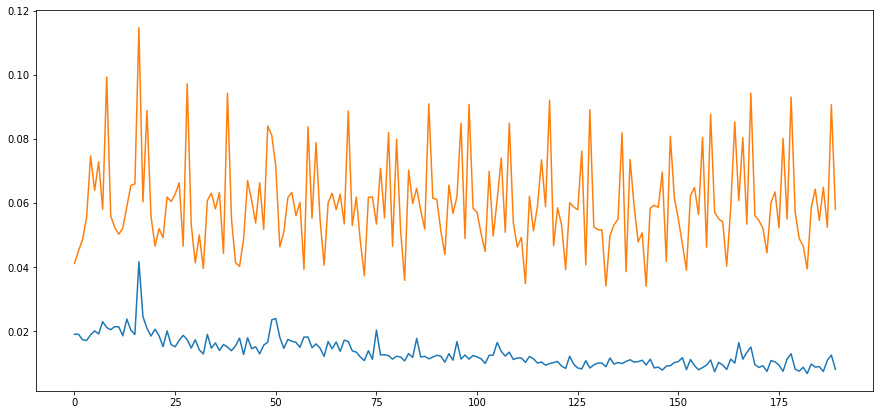

In [5]:
plt.plot(train_loss[110:])
plt.plot(test_loss[110:])